# Logistic Regression Comparison Exercise
Compare three versions of logistic regression

Selected dataset from UC Irvine dataset repository:
https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn import ensemble
from sklearn.cluster import KMeans 

In [81]:
df = pd.read_csv('epileptic_seizures.csv')

## Exploring the data

In [4]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [5]:
df.tail()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3
11499,X16.V1.210,29,41,57,72,74,62,54,43,31,...,-59,-25,-4,2,5,4,-2,2,20,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed: 0 to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [7]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [8]:
df.isna().sum().sum()

0

In [9]:
df.dtypes

Unnamed: 0    object
X1             int64
X2             int64
X3             int64
X4             int64
X5             int64
X6             int64
X7             int64
X8             int64
X9             int64
X10            int64
X11            int64
X12            int64
X13            int64
X14            int64
X15            int64
X16            int64
X17            int64
X18            int64
X19            int64
X20            int64
X21            int64
X22            int64
X23            int64
X24            int64
X25            int64
X26            int64
X27            int64
X28            int64
X29            int64
               ...  
X150           int64
X151           int64
X152           int64
X153           int64
X154           int64
X155           int64
X156           int64
X157           int64
X158           int64
X159           int64
X160           int64
X161           int64
X162           int64
X163           int64
X164           int64
X165           int64
X166         

In [10]:
X = df.drop(columns=['Unnamed: 0', 'y']).values
y = np.where(df['y'] == 1, 1, 0).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [62]:
print('The percentage of epilepsy occurances is {}%'.format(y.sum()/len(y)*100))

The percentage of epilepsy occurances is 20.0%


## Regular Logistic Regression

In [97]:
logreg = LogisticRegression(solver='liblinear', max_iter=200, C=10**9)
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.8188405797101449

In [99]:
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('The score of the regular logistic regression is {:.3f}'.format(logreg.score(X_test, y_test)))

[[2746    7]
 [ 618   79]]
The score of the regular logistic regression is 0.819


## Ridge Logistic Regression

In [27]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
ridge = LogisticRegression(solver='liblinear', penalty='l2', max_iter=200)
grid_ridge = GridSearchCV(ridge, param_grid, cv=3)

In [28]:
grid_ridge.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
grid_ridge.best_params_

{'C': 0.001}

In [30]:
grid_ridge.best_score_

0.8303105590062112

In [31]:
grid_ridge.score(X_test, y_test)

0.8228985507246377

In [94]:
y_pred = grid_ridge.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('The ridge score on the test set is {:.3f}'.format(grid_ridge.score(X_test, y_test)))

[[2733   20]
 [ 591  106]]
The ridge score on the test set is 0.823


## Lasso Logistic Regression

In [33]:
lasso = LogisticRegression(solver='liblinear', penalty='l1', max_iter=200)
grid_lass = GridSearchCV(lasso, param_grid, cv=3)
grid_lass.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
grid_lass.best_params_

{'C': 0.1}

In [35]:
grid_lass.best_score_

0.826583850931677

In [36]:
grid_lass.score(X_test, y_test)

0.8182608695652174

In [95]:
y_pred = grid_lass.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('The lasso score on the test set is {:.3f}'.format(grid_lass.score(X_test, y_test)))

[[2746    7]
 [ 620   77]]
The lasso score on the test set is 0.818


## Try with PCA for feature reduction

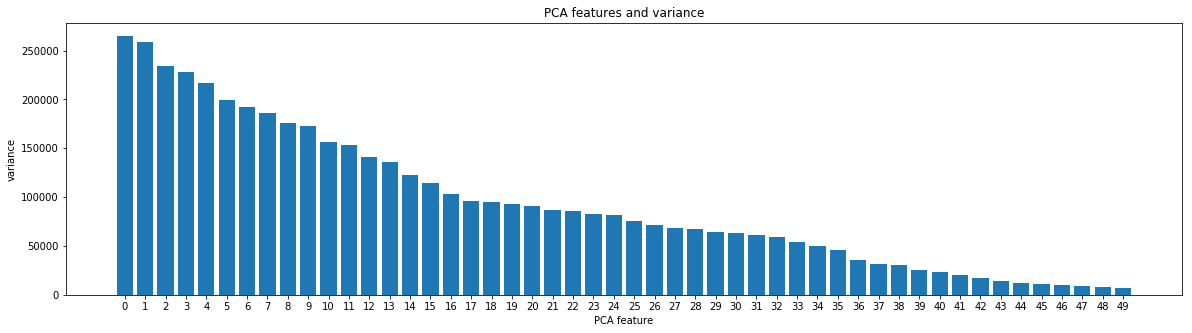

In [38]:
pca = PCA()
pca.fit(X_train)
transform = pca.transform(X_train)

features = range(50)
plt.figure(figsize=(20, 5))
plt.bar(features, pca.explained_variance_[0:50])
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.title('PCA features and variance')
plt.show()

In [100]:
n = 100

pca_n = PCA(n_components=n)
pipeline = make_pipeline(pca_n, logreg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
score = pipeline.score(X_test, y_test)

print('Score of PCA on training set with {} components is {:.2f}'.format(n, pipeline.score(X_train, y_train)))
print('Score of PCA on test training set with {} components is {:.2f}'.format(n, score))
print('The confusion matrix is:\n {}'.format(confusion_matrix(y_test, y_pred)))


Score of PCA on training set with 100 components is 0.83
Score of PCA on test training set with 100 components is 0.82
The confusion matrix is:
 [[2751    2]
 [ 635   62]]


### Try standard scaling parameters before PCA - model gets worse

In [53]:
scaler = StandardScaler()
pipeline_scaled = make_pipeline(scaler, pca_n, logreg)
pipeline_scaled.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
score = pipeline.score(X_test, y_test)

print('Score of scaled PCA with {} components is {}'.format(n, score))
print('The confusion matrix is:\n {}'.format(confusion_matrix(y_test, y_pred)))

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Score of scaled PCA with 150 components is 0.524927536231884
The confusion matrix is:
 [[1474 1279]
 [ 360  337]]


In [78]:
num_features = 30

selectK = SelectKBest(f_classif, k=num_features)

pipeline_K = make_pipeline(selectK, logreg)
pipeline_K.fit(X_train, y_train)
y_pred = pipeline_K.predict(X_test)
score = pipeline_K.score(X_test, y_test)

print('Score of K_best with {} components is {:.2f}'.format(num_features, score))
print('The confusion matrix is:\n {}'.format(confusion_matrix(y_test, y_pred)))

Score of K_best with 30 components is 0.81
The confusion matrix is:
 [[2753    0]
 [ 663   34]]


### Let's try another approach - Trees!

In [88]:
# Make a basic tree model
rfc = ensemble.RandomForestClassifier(n_estimators=10)
cross_val_score(rfc, X_train, y_train, cv=5)

array([0.97020484, 0.96151459, 0.96459627, 0.96146675, 0.96581728])

In [89]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
score = rfc.score(X_test, y_test)

print('Score of Random Forest Classifier is {:.2f}'.format(score))
print('The confusion matrix is:\n {}'.format(confusion_matrix(y_test, y_pred)))

Score of Random Forest Classifier is 0.97
The confusion matrix is:
 [[2707   46]
 [  69  628]]


In [92]:
n = 20

pca_n = PCA(n_components=n)
pipeline = make_pipeline(pca_n, rfc)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
score = pipeline.score(X_test, y_test)

print('Score of rfc with PCA on training set with {} components is {:.2f}'.format(n, pipeline.score(X_train, y_train)))
print('Score of rfc with PCA on test training set with {} components is {:.2f}'.format(n, score))
print('The confusion matrix is:\n {}'.format(confusion_matrix(y_test, y_pred)))

Score of rfc with PCA on training set with 20 components is 1.00
Score of rfc with PCA on test training set with 20 components is 0.96
The confusion matrix is:
 [[2684   69]
 [  59  638]]


In [93]:
num_features = 30

selectK = SelectKBest(f_classif, k=num_features)

pipeline_K = make_pipeline(selectK, rfc)
pipeline_K.fit(X_train, y_train)
y_pred = pipeline_K.predict(X_test)
score = pipeline_K.score(X_test, y_test)

print('Score of K_best with {} components is {:.2f}'.format(num_features, score))
print('The confusion matrix is:\n {}'.format(confusion_matrix(y_test, y_pred)))

Score of K_best with 30 components is 0.96
The confusion matrix is:
 [[2701   52]
 [  91  606]]


## Lessons Learned

This dataset is modeled much better by an ensemble Random Forest Classifier than by the logistic regressions.  That being said, out of the three logistic models, the Ridge Classifier performed the best. The regular logistic regression also improves if we try PCA on it and limit the components. Standard scaling the features before PCA made the model much worse.  


The best model is the Ridge Logistic Regression with PCA performed on the parameters and then using PCA for feature reduction. Since the features are already annonymized, not much interpretation is lost by using PCA features instead of regular features.  I used the same C value of .001 as found through the grid search.  Smaller values of C indicate greater regularization.

#### The winning logistic regression model

In [119]:
n = 110
ridge2 = LogisticRegression(solver='liblinear', penalty='l2', max_iter=200, C=.001)

pca_n = PCA(n_components=n)
pipeline = make_pipeline(pca_n, ridge2)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
score = pipeline.score(X_test, y_test)

print('Score of PCA on training set with {} components is {:.2f}'.format(n, pipeline.score(X_train, y_train)))
print('Score of PCA on test training set with {} components is {:.2f}'.format(n, score))
print('The confusion matrix is:\n {}'.format(confusion_matrix(y_test, y_pred)))

Score of PCA on training set with 110 components is 0.84
Score of PCA on test training set with 110 components is 0.83
The confusion matrix is:
 [[2747    6]
 [ 588  109]]


#### Just checking that select K best for similar feature numbers isn't as good, nope, slightly worse

In [112]:
num_features = 110

selectK = SelectKBest(f_classif, k=num_features)

pipeline_K = make_pipeline(selectK, ridge2)
pipeline_K.fit(X_train, y_train)
y_pred = pipeline_K.predict(X_test)
score = pipeline_K.score(X_test, y_test)

print('Score of K_best with {} components is {:.2f}'.format(num_features, score))
print('The confusion matrix is:\n {}'.format(confusion_matrix(y_test, y_pred)))

Score of K_best with 110 components is 0.82
The confusion matrix is:
 [[2741   12]
 [ 607   90]]
